In [957]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display, Markdown

dataset = pd.read_csv('dataset_world_happiness.csv')
print(dataset.isnull().sum())

Country                          303
Region                           150
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           303
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                303
Year                               0
dtype: int64


In [958]:
# break up data by years
def separateYears(data,year):
    if(year>2015):
        return data.loc[data['Year']==year].reset_index()
    else:
        return data.loc[data['Year']==year]

In [959]:
# 2015
dataset_2015 = separateYears(dataset, 2015) 
dataset_2015.pop('Year')
print(dataset_2015.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP Per Capita                   0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [960]:
# 2016
dataset_2016 = separateYears(dataset,2016)
dataset_2016.drop('index', inplace=True, axis=1)
dataset_2016.pop('Year')
print(dataset_2016.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP Per Capita                   0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [961]:
# 2017
dataset_2017 = separateYears(dataset,2017)
dataset_2017.drop('index', inplace=True, axis=1)
dataset_2017.pop('Year')
print(dataset_2017.isnull().sum())

Country                            0
Region                           150
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
dtype: int64


In [962]:
print(dataset_2017.head())

       Country Region  Happiness Rank  Happiness Score  GDP Per Capita  \
0       Norway    NaN               1            7.537        1.616463   
1      Denmark    NaN               2            7.522        1.482383   
2      Iceland    NaN               3            7.504        1.480633   
3  Switzerland    NaN               4            7.494        1.564980   
4      Finland    NaN               5            7.469        1.443572   

     Family  Health (Life Expectancy)   Freedom  \
0  1.533524                  0.796667  0.635423   
1  1.551122                  0.792566  0.626007   
2  1.610574                  0.833552  0.627163   
3  1.516912                  0.858131  0.620071   
4  1.540247                  0.809158  0.617951   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.315964    0.362012           2.277027  
1                       0.400770    0.355280           2.313707  
2                       0.153527    0.475540      

In [963]:
#2018
dataset_2018 = separateYears(dataset,2018)
dataset_2018.pop('Year')
dataset_2018.drop('index', inplace=True, axis=1)
print("Before")
print(dataset_2018.isnull().sum())

Before
Country                          149
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           149
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                149
dtype: int64


In [964]:
print(dataset_2018.head())

  Country       Region  Happiness Rank  Happiness Score  GDP Per Capita  \
0     NaN      Finland               1            7.632           1.305   
1     NaN      Denmark               3            7.555           1.351   
2     NaN      Iceland               4            7.495           1.343   
3     NaN  Switzerland               5            7.487           1.420   
4     NaN  Netherlands               6            7.441           1.361   

   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0     NaN                     0.874    0.681                          0.393   
1     NaN                     0.868    0.683                          0.408   
2     NaN                     0.914    0.677                          0.138   
3     NaN                     0.927    0.660                          0.357   
4     NaN                     0.878    0.638                          0.295   

   Generosity  Dystopia Residual  
0       0.202                NaN  
1   

In [965]:
dataset_2018.Country.fillna(dataset_2018.Region, inplace=True)
print("\nAfter")
print(dataset_2018.isnull().sum())


After
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           149
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                149
dtype: int64


In [966]:
print(dataset_2018.head())

       Country       Region  Happiness Rank  Happiness Score  GDP Per Capita  \
0      Finland      Finland               1            7.632           1.305   
1      Denmark      Denmark               3            7.555           1.351   
2      Iceland      Iceland               4            7.495           1.343   
3  Switzerland  Switzerland               5            7.487           1.420   
4  Netherlands  Netherlands               6            7.441           1.361   

   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0     NaN                     0.874    0.681                          0.393   
1     NaN                     0.868    0.683                          0.408   
2     NaN                     0.914    0.677                          0.138   
3     NaN                     0.927    0.660                          0.357   
4     NaN                     0.878    0.638                          0.295   

   Generosity  Dystopia Residual  
0       0

In [967]:
# 2019
dataset_2019 = separateYears(dataset,2019)
dataset_2019.drop('index', inplace=True, axis=1)
dataset_2019.pop('Year')
print("Before")
print(dataset_2019.isnull().sum())

Before
Country                          154
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           154
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                154
dtype: int64


In [968]:
print(dataset_2019.head())

  Country       Region  Happiness Rank  Happiness Score  GDP Per Capita  \
0     NaN      Finland               1            7.769           1.340   
1     NaN      Denmark               2            7.600           1.383   
2     NaN       Norway               3            7.554           1.488   
3     NaN      Iceland               4            7.494           1.380   
4     NaN  Netherlands               5            7.488           1.396   

   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0     NaN                     0.986    0.596                          0.393   
1     NaN                     0.996    0.592                          0.410   
2     NaN                     1.028    0.603                          0.341   
3     NaN                     1.026    0.591                          0.118   
4     NaN                     0.999    0.557                          0.298   

   Generosity  Dystopia Residual  
0       0.153                NaN  
1   

In [969]:
dataset_2019.Country.fillna(dataset_2019.Region, inplace=True)
print("\nAfter")
print(dataset_2019.isnull().sum())


After
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
GDP Per Capita                     0
Family                           154
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                154
dtype: int64


In [970]:
print(dataset_2019.head())

       Country       Region  Happiness Rank  Happiness Score  GDP Per Capita  \
0      Finland      Finland               1            7.769           1.340   
1      Denmark      Denmark               2            7.600           1.383   
2       Norway       Norway               3            7.554           1.488   
3      Iceland      Iceland               4            7.494           1.380   
4  Netherlands  Netherlands               5            7.488           1.396   

   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0     NaN                     0.986    0.596                          0.393   
1     NaN                     0.996    0.592                          0.410   
2     NaN                     1.028    0.603                          0.341   
3     NaN                     1.026    0.591                          0.118   
4     NaN                     0.999    0.557                          0.298   

   Generosity  Dystopia Residual  
0       0

In [971]:
# Merging 2015 and 2016 (Call temp)
temp = pd.merge(dataset_2015, dataset_2016, on = 'Country')
temp.rename(columns = {'Region_x' : 'Region',
                      'Happiness Rank_x' : 'Happiness Rank_2015',
                      'Happiness Score_x' : 'Happiness Score_2015',
                      'GDP Per Capita_x':'GDP Per Capita_2015',
                      'Family_x':'Family_2015',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2015',
                      'Freedom_x':'Freedom_2015',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2015',
                      'Generosity_x':'Generosity_2015',
                      'Dystopia Residual_x':'Dystopia Residual_2015',
                      'Region_y' : 'Region_2016',
                      'Happiness Rank_y' : 'Happiness Rank_2016',
                      'Happiness Score_y' : 'Happiness Score_2016',
                      'GDP Per Capita_y':'GDP Per Capita_2016',
                      'Family_y':'Family_2016',
                      'Health (Life Expectancy)_y':'Health (Life Expectancy)_2016',
                      'Freedom_y':'Freedom_2016',
                      'Trust (Government Corruption)_y':'Trust (Government Corruption)_2016',
                      'Generosity_y':'Generosity_2016',
                      'Dystopia Residual_y':'Dystopia Residual_2016'}, inplace = True)

In [972]:
# Merging 2015,2016 with 2017
temp2 = pd.merge(temp, dataset_2017,on = 'Country')
temp2.drop('Region_y', inplace =True, axis =1)

In [973]:
# Merging 2015-2017 with 2018
temp3 = pd.merge(temp2, dataset_2018,on = 'Country')
temp3.drop('Region', inplace =True, axis =1)
temp3.drop('Region_2016', inplace =True, axis =1)
temp3.rename(columns = {'Happiness Rank_x' : 'Happiness Rank_2017',
                      'Happiness Score_x' : 'Happiness Score_2017',
                      'GDP Per Capita_x':'GDP Per Capita_2017',
                      'Family_x':'Family_2017',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2017',
                      'Freedom_x':'Freedom_2017',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2017',
                      'Generosity_x':'Generosity_2017',
                      'Dystopia Residual_x':'Dystopia Residual_2017',
                      'Happiness Rank_y' : 'Happiness Rank_2018',
                      'Happiness Score_y' : 'Happiness Score_2018',
                      'GDP Per Capita_y':'GDP Per Capita_2018',
                      'Family_y':'Family_2018',
                      'Health (Life Expectancy)_y':'Health (Life Expectancy)_2018',
                      'Freedom_y':'Freedom_2018',
                      'Trust (Government Corruption)_y':'Trust (Government Corruption)_2018',
                      'Generosity_y':'Generosity_2018',
                      'Dystopia Residual_y':'Dystopia Residual_2018'}, inplace = True)

In [974]:
# Merging 2015-2018 with 2019
newData = pd.merge(temp3,dataset_2019,on = 'Country')
newData.drop('Region', inplace =True, axis =1)
newData.rename(columns = {'Happiness Rank_x' : 'Happiness Rank_2018',
                      'Happiness Score_x' : 'Happiness Score_2018',
                      'GDP Per Capita_x':'GDP Per Capita_2018',
                      'Family_x':'Family_2018',
                      'Health (Life Expectancy)_x':'Health (Life Expectancy)_2018',
                      'Freedom_x':'Freedom_2017',
                      'Trust (Government Corruption)_x':'Trust (Government Corruption)_2018',
                      'Generosity_x':'Generosity_2018',
                      'Dystopia Residual_x':'Dystopia Residual_2018',
                      'Happiness Rank' : 'Happiness Rank_2019',
                      'Happiness Score' : 'Happiness Score_2019',
                      'GDP Per Capita':'GDP Per Capita_2019',
                      'Family':'Family_2019',
                      'Health (Life Expectancy)':'Health (Life Expectancy)_2019',
                      'Freedom':'Freedom_2019',
                      'Trust (Government Corruption)':'Trust (Government Corruption)_2019',
                      'Generosity':'Generosity_2019',
                      'Dystopia Residual':'Dystopia Residual_2019',
                       'Region_x':'Region'}, inplace = True)

In [975]:
# Filling in the NaN with the averages of previous years
newData['Family_2018'] = newData[['Family_2015', 'Family_2016','Family_2017']].mean(axis=1)
newData['Family_2019'] = newData[['Family_2015', 'Family_2016','Family_2017','Family_2018']].mean(axis=1)
newData['Dystopia Residual_2018'] = newData[['Dystopia Residual_2015', 'Dystopia Residual_2016','Dystopia Residual_2017']].mean(axis=1)
newData['Dystopia Residual_2019'] = newData[['Dystopia Residual_2015', 'Dystopia Residual_2016','Dystopia Residual_2017','Dystopia Residual_2018']].mean(axis=1)

In [976]:
# Filling in the NaN in Trust by averaging the previous years
uae = newData.loc[newData['Country']=='United Arab Emirates']
avg_uae=uae[['Trust (Government Corruption)_2015','Trust (Government Corruption)_2016','Trust (Government Corruption)_2017','Trust (Government Corruption)_2019']].mean(axis=1)
newData.loc[17,'Trust (Government Corruption)_2018']=avg_uae.loc[17]
newData.to_csv('data.csv')
newData.head()

,Country,Region,Happiness Rank_2015,Happiness Score_2015,GDP Per Capita_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,...,Dystopia Residual_2018,Happiness Rank_2019,Happiness Score_2019,GDP Per Capita_2019,Family_2019,Health (Life Expectancy)_2019,Freedom_2019,Trust (Government Corruption)_2019,Generosity_2019,Dystopia Residual_2019
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,2.496242,6,7.480,1.452,1.337221,1.052,0.572,0.343,0.263,2.496242
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,2.618698,4,7.494,1.380,1.398688,1.026,0.591,0.118,0.354,2.618698
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,2.515046,2,7.600,1.383,1.358481,0.996,0.592,0.410,0.252,2.515046
3,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,2.447958,9,7.278,1.365,1.300020,1.039,0.584,0.308,0.285,2.447958
4,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,...,2.625231,1,7.769,1.340,1.331049,0.986,0.596,0.393,0.153,2.625231


In [977]:
columns = ['Country','Region','Happiness Rank','Happiness Score','GDP Per Capita','Family','HLE','Freedom','Trust','Generosity','Dystopia Residual']
data2015 = newData[['Country','Region','Happiness Rank_2015','Happiness Score_2015','GDP Per Capita_2015','Family_2015','Health (Life Expectancy)_2015','Freedom_2015','Trust (Government Corruption)_2015','Generosity_2015','Dystopia Residual_2015']]
data2015.columns = columns
data2015 = data2015.assign(Year=2015)

In [978]:
data2016 = newData[['Country','Region','Happiness Rank_2016','Happiness Score_2016','GDP Per Capita_2016','Family_2016','Health (Life Expectancy)_2016','Freedom_2016','Trust (Government Corruption)_2016','Generosity_2016','Dystopia Residual_2016']]
data2016.columns = columns
data2016 = data2016.assign(Year=2016)

In [979]:
data2017 = newData[['Country','Region','Happiness Rank_2017','Happiness Score_2017','GDP Per Capita_2017','Family_2017','Health (Life Expectancy)_2017','Freedom_2017','Trust (Government Corruption)_2017','Generosity_2017','Dystopia Residual_2017']]
data2017.columns = columns
data2017 = data2017.assign(Year=2017)

In [980]:
data2018 = newData[['Country','Region','Happiness Rank_2018','Happiness Score_2018','GDP Per Capita_2018','Family_2018','Health (Life Expectancy)_2018','Freedom_2018','Trust (Government Corruption)_2018','Generosity_2018','Dystopia Residual_2018']]
data2018.columns = columns
data2018 = data2018.assign(Year=2018)

In [981]:
data2019 = newData[['Country','Region','Happiness Rank_2019','Happiness Score_2019','GDP Per Capita_2019','Family_2019','Health (Life Expectancy)_2019','Freedom_2019','Trust (Government Corruption)_2019','Generosity_2019','Dystopia Residual_2019']]
data2019.columns = columns
data2019 = data2019.assign(Year=2019)

# 2015

In [982]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,HLE,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
4,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015


# 2016

In [983]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,HLE,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
1,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
2,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
3,Canada,North America,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


# 2017

In [984]:
data2017.head()

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,HLE,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
1,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
2,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
3,Canada,North America,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264,2017
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017


# 2018

In [985]:
data2018.head()

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,HLE,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,5,7.487,1.420,1.337221,0.927,0.660,0.357,0.256,2.496242,2018
1,Iceland,Western Europe,4,7.495,1.343,1.398688,0.914,0.677,0.138,0.353,2.618698,2018
2,Denmark,Western Europe,3,7.555,1.351,1.358481,0.868,0.683,0.408,0.284,2.515046,2018
3,Canada,North America,7,7.328,1.330,1.300020,0.896,0.653,0.291,0.321,2.447958,2018
4,Finland,Western Europe,1,7.632,1.305,1.331049,0.874,0.681,0.393,0.202,2.625231,2018


# 2019

In [986]:
data2019.head()

,Country,Region,Happiness Rank,Happiness Score,GDP Per Capita,Family,HLE,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,6,7.480,1.452,1.337221,1.052,0.572,0.343,0.263,2.496242,2019
1,Iceland,Western Europe,4,7.494,1.380,1.398688,1.026,0.591,0.118,0.354,2.618698,2019
2,Denmark,Western Europe,2,7.600,1.383,1.358481,0.996,0.592,0.410,0.252,2.515046,2019
3,Canada,North America,9,7.278,1.365,1.300020,1.039,0.584,0.308,0.285,2.447958,2019
4,Finland,Western Europe,1,7.769,1.340,1.331049,0.986,0.596,0.393,0.153,2.625231,2019


In [987]:
X = np.linspace(0,9,10)
ten_happy_countries_2015 = np.array(data2015[['Country']][:10])
ten_happy_countries_2016 = np.array(data2016[['Country']][:10])
ten_happy_countries_2017 = np.array(data2017[['Country']][:10])
ten_happy_countries_2018 = np.array(data2018[['Country']][:10])
ten_happy_countries_2019 = np.array(data2019[['Country']][:10])

In [988]:
def country_list(country_list):
    i=0
    countries =[]
    while i<10:
        countries.append(country_list[i,0])
        i+=1
    return countries
def country_list_score(country_list):
    i=0
    countries =[]
    while i<10:
        countries.append(country_list[i,0])
        i+=1
    return countries

In [989]:
countries_2015 = country_list(ten_happy_countries_2015)
countries_2016 = country_list(ten_happy_countries_2016)
countries_2017 = country_list(ten_happy_countries_2017)
countries_2018 = country_list(ten_happy_countries_2018)
countries_2019 = country_list(ten_happy_countries_2019)

In [990]:
ten_happy_countries_score_2015 = np.array(data2015[['Happiness Score']][:10])
ten_happy_countries_score_2016 = np.array(data2016[['Happiness Score']][:10])
ten_happy_countries_score_2017 = np.array(data2017[['Happiness Score']][:10])
ten_happy_countries_score_2018 = np.array(data2018[['Happiness Score']][:10])
ten_happy_countries_score_2019 = np.array(data2019[['Happiness Score']][:10])

In [991]:
countries_2015_score = country_list_score(ten_happy_countries_score_2015)
countries_2016_score = country_list_score(ten_happy_countries_score_2016)
countries_2017_score = country_list_score(ten_happy_countries_score_2017)
countries_2018_score = country_list_score(ten_happy_countries_score_2018)
countries_2019_score = country_list_score(ten_happy_countries_score_2019)

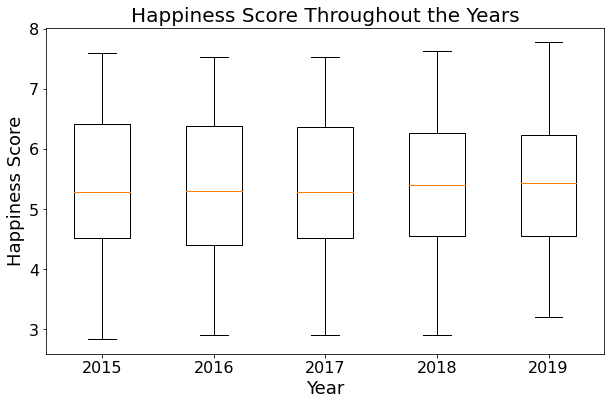

In [992]:
plt.boxplot([data2015['Happiness Score'], data2016['Happiness Score'],
             data2017['Happiness Score'], data2018['Happiness Score'],data2019['Happiness Score']])
plt.xticks([1,2,3,4,5],['2015','2016','2017','2018','2019'],fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Happiness Score',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.title('Happiness Score Throughout the Years',fontsize=20)
plt.gcf().set_size_inches(10,6)
plt.show()

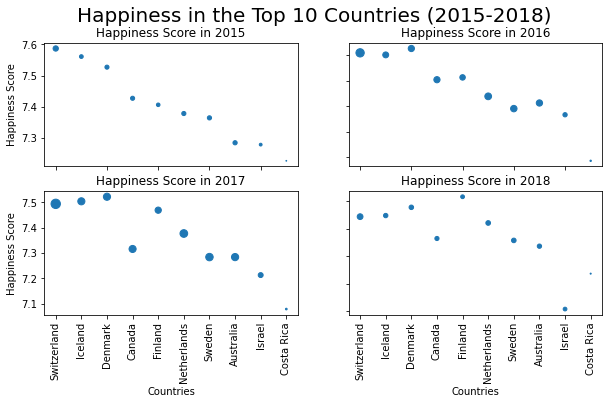

In [993]:
fig, axs = plt.subplots(2, 2,figsize=(10,5))
axs[0, 0].scatter(X, countries_2015_score,s=ten_happy_countries_GDP_2015**10)
axs[0, 1].scatter(X, countries_2016_score,s=ten_happy_countries_GDP_2016**10)
axs[1, 0].scatter(X, countries_2017_score,s=ten_happy_countries_GDP_2017**10)
axs[1, 1].scatter(X, countries_2018_score,s=ten_happy_countries_GDP_2018**10)
axs[1,0].set_xticks(X,countries_2015,rotation=90)
axs[1,1].set_xticks(X,countries_2015,rotation=90)
axs[0,0].set_title("Happiness Score in 2015")
axs[0,1].set_title("Happiness Score in 2016")
axs[1,0].set_title("Happiness Score in 2017")
axs[1,1].set_title("Happiness Score in 2018")
fig.suptitle('Happiness in the Top 10 Countries (2015-2018)', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='Countries', ylabel='Happiness Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Columns vs Happiness Score in 2015

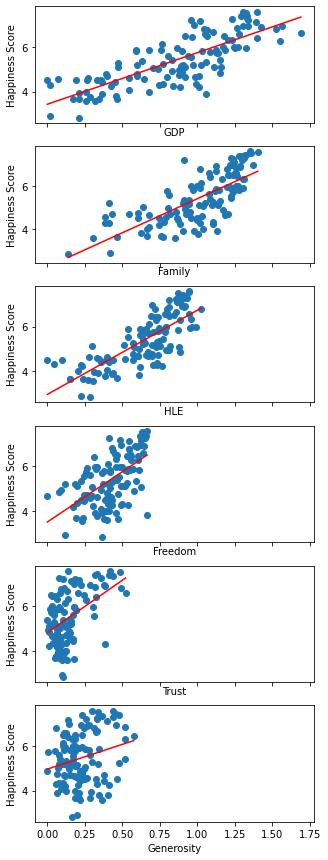

In [994]:
m2015_GDP,b2015_GDP,r2015_GDP,p2015_GDP,s2015_GDP = LR(data2015["GDP Per Capita"],data2015["Happiness Score"])
m2015_Family,b2015_Family,r2015_Family,p2015_Family,s2015_Family = LR(data2015["Family"],data2016["Happiness Score"])
m2015_HLE,b2015_HLE,r2015_HLE,p2015_HLE,s2015_HLE = LR(data2015["HLE"],data2017["Happiness Score"])
m2015_Freedom,b2015_Freedom,r2015_Freedom,p2015_Freedom,s2015_Freedom = LR(data2015["Freedom"],data2018["Happiness Score"])
m2015_Trust,b2015_Trust,r2015_Trust,p2015_Trust,s2015_Trust = LR(data2015["Trust"],data2019["Happiness Score"])
m2015_Generosity,b2015_Generosity,r2015_Generosity,p2015_Generosity,s2015_Generosity = LR(data2015["Generosity"],data2019["Happiness Score"]) 
X2015_GDP = np.array(data2015["GDP Per Capita"])
X2015_Family = np.array(data2015["Family"])
X2015_HLE = np.array(data2015["HLE"])
X2015_Freedom = np.array(data2015["Freedom"])
X2015_Trust = np.array(data2015["Trust"])
X2015_Gen = np.array(data2015["Generosity"])
Y2015 = np.array(data2015["Happiness Score"])
display(Markdown("# Columns vs Happiness Score in 2015"))
fig, axs = plt.subplots(6,figsize=(5,15),sharex=True)
xline2015_GDP=np.linspace(min(X2015_GDP),max(X2015_GDP),100)
yline2015_GDP=m2015_GDP*xline2015_GDP+b2015_GDP
axs[0].plot(xline2015_GDP,yline2015_GDP,color="red")
xline2015_Family=np.linspace(min(X2015_Family),max(X2015_Family),100)
yline2015_Family=m2015_Family*xline2015_Family+b2015_Family
axs[1].plot(xline2015_Family,yline2015_Family,color="red")
xline2015_HLE=np.linspace(min(X2015_HLE),max(X2015_HLE),100)
yline2015_HLE=m2015_HLE*xline2015_HLE+b2015_HLE
axs[2].plot(xline2015_HLE,yline2015_HLE,color="red")
xline2015_Freedom=np.linspace(min(X2015_Freedom),max(X2015_Freedom),100)
yline2015_Freedom=m2015_Freedom*xline2015_Freedom+b2015_Freedom
axs[3].plot(xline2015_Freedom,yline2015_Freedom,color="red")
xline2015_Trust=np.linspace(min(X2015_Trust),max(X2015_Trust),100)
yline2015_Trust=m2015_Trust*xline2015_Trust+b2015_Trust
axs[4].plot(xline2015_Trust,yline2015_Trust,color="red")
xline2015_Gen=np.linspace(min(X2015_Gen),max(X2015_Gen),100)
yline2015_Gen=m2015_Generosity*xline2015_Gen+b2015_Generosity
axs[5].plot(xline2015_Gen,yline2015_Gen,color="red")
axs[0].scatter(X2015_GDP, Y2015)
axs[1].scatter(X2015_Family, Y2015)
axs[2].scatter(X2015_HLE, Y2015)
axs[3].scatter(X2015_Freedom, Y2015)
axs[4].scatter(X2015_Trust, Y2015)
axs[5].scatter(X2015_Gen, Y2015)
axs[0].set_xlabel('GDP')
axs[1].set_xlabel('Family')
axs[2].set_xlabel('HLE')
axs[3].set_xlabel('Freedom')
axs[4].set_xlabel('Trust')
axs[5].set_xlabel('Generosity')
for ax in axs.flat:
    ax.set(ylabel='Happiness Score')
plt.show()

# Columns vs Happiness Score in 2016

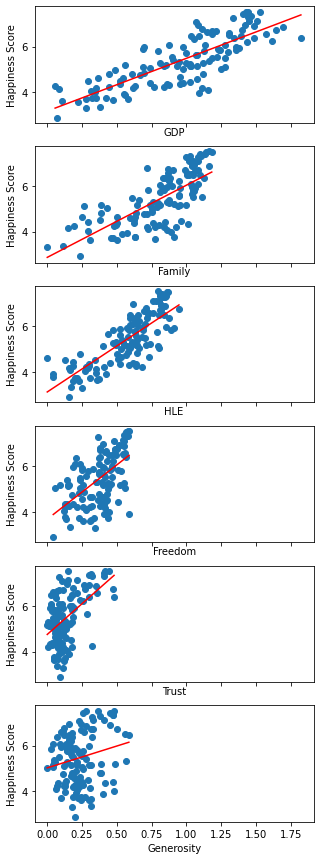

In [995]:
m2016_GDP,b2016_GDP,r2016_GDP,p2016_GDP,s2016_GDP = LR(data2016["GDP Per Capita"],data2016["Happiness Score"])
m2016_Family,b2016_Family,r2016_Family,p2016_Family,s2016_Family = LR(data2016["Family"],data2016["Happiness Score"])
m2016_HLE,b2016_HLE,r2016_HLE,p2016_HLE,s2016_HLE = LR(data2016["HLE"],data2017["Happiness Score"])
m2016_Freedom,b2016_Freedom,r2016_Freedom,p2016_Freedom,s2016_Freedom = LR(data2016["Freedom"],data2018["Happiness Score"])
m2016_Trust,b2016_Trust,r2016_Trust,p2016_Trust,s2016_Trust = LR(data2016["Trust"],data2019["Happiness Score"])
m2016_Generosity,b2016_Generosity,r2016_Generosity,p2016_Generosity,s2016_Generosity = LR(data2016["Generosity"],data2019["Happiness Score"]) 
X2016_GDP = np.array(data2016["GDP Per Capita"])
X2016_Family = np.array(data2016["Family"])
X2016_HLE = np.array(data2016["HLE"])
X2016_Freedom = np.array(data2016["Freedom"])
X2016_Trust = np.array(data2016["Trust"])
X2016_Gen = np.array(data2016["Generosity"])
Y2016 = np.array(data2016["Happiness Score"])
display(Markdown("# Columns vs Happiness Score in 2016"))
fig, axs = plt.subplots(6,figsize=(5,15),sharex=True)
xline2016_GDP=np.linspace(min(X2016_GDP),max(X2016_GDP),100)
yline2016_GDP=m2016_GDP*xline2016_GDP+b2016_GDP
axs[0].plot(xline2016_GDP,yline2016_GDP,color="red")
xline2016_Family=np.linspace(min(X2016_Family),max(X2016_Family),100)
yline2016_Family=m2016_Family*xline2016_Family+b2016_Family
axs[1].plot(xline2016_Family,yline2016_Family,color="red")
xline2016_HLE=np.linspace(min(X2016_HLE),max(X2016_HLE),100)
yline2016_HLE=m2016_HLE*xline2016_HLE+b2016_HLE
axs[2].plot(xline2016_HLE,yline2016_HLE,color="red")
xline2016_Freedom=np.linspace(min(X2016_Freedom),max(X2016_Freedom),100)
yline2016_Freedom=m2016_Freedom*xline2016_Freedom+b2016_Freedom
axs[3].plot(xline2016_Freedom,yline2016_Freedom,color="red")
xline2016_Trust=np.linspace(min(X2016_Trust),max(X2016_Trust),100)
yline2016_Trust=m2016_Trust*xline2016_Trust+b2016_Trust
axs[4].plot(xline2016_Trust,yline2016_Trust,color="red")
xline2016_Gen=np.linspace(min(X2016_Gen),max(X2016_Gen),100)
yline2016_Gen=m2016_Generosity*xline2016_Gen+b2016_Generosity
axs[5].plot(xline2016_Gen,yline2016_Gen,color="red")
axs[0].scatter(X2016_GDP, Y2016)
axs[1].scatter(X2016_Family, Y2016)
axs[2].scatter(X2016_HLE, Y2016)
axs[3].scatter(X2016_Freedom, Y2016)
axs[4].scatter(X2016_Trust, Y2016)
axs[5].scatter(X2016_Gen, Y2016)
axs[0].set_xlabel('GDP')
axs[1].set_xlabel('Family')
axs[2].set_xlabel('HLE')
axs[3].set_xlabel('Freedom')
axs[4].set_xlabel('Trust')
axs[5].set_xlabel('Generosity')
for ax in axs.flat:
    ax.set(ylabel='Happiness Score')
plt.show()

# Columns vs Happiness Score in 2017

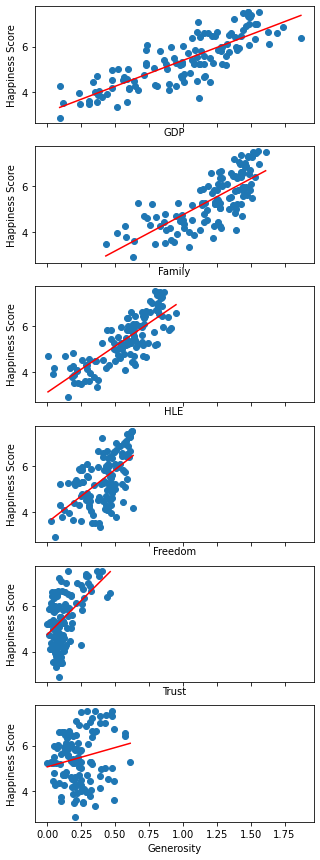

In [996]:
m2017_GDP,b2017_GDP,r2017_GDP,p2017_GDP,s2017_GDP = LR(data2017["GDP Per Capita"],data2017["Happiness Score"])
m2017_Family,b2017_Family,r2017_Family,p2017_Family,s2017_Family = LR(data2017["Family"],data2017["Happiness Score"])
m2017_HLE,b2017_HLE,r2017_HLE,p2017_HLE,s2017_HLE = LR(data2017["HLE"],data2017["Happiness Score"])
m2017_Freedom,b2017_Freedom,r2017_Freedom,p2017_Freedom,s2017_Freedom = LR(data2017["Freedom"],data2018["Happiness Score"])
m2017_Trust,b2017_Trust,r2017_Trust,p2017_Trust,s2017_Trust = LR(data2017["Trust"],data2019["Happiness Score"])
m2017_Generosity,b2017_Generosity,r2017_Generosity,p2017_Generosity,s2017_Generosity = LR(data2017["Generosity"],data2019["Happiness Score"]) 
X2017_GDP = np.array(data2017["GDP Per Capita"])
X2017_Family = np.array(data2017["Family"])
X2017_HLE = np.array(data2017["HLE"])
X2017_Freedom = np.array(data2017["Freedom"])
X2017_Trust = np.array(data2017["Trust"])
X2017_Gen = np.array(data2017["Generosity"])
Y2017 = np.array(data2017["Happiness Score"])
display(Markdown("# Columns vs Happiness Score in 2017"))
fig, axs = plt.subplots(6,figsize=(5,15),sharex=True)
xline2017_GDP=np.linspace(min(X2017_GDP),max(X2017_GDP),100)
yline2017_GDP=m2017_GDP*xline2017_GDP+b2017_GDP
axs[0].plot(xline2017_GDP,yline2017_GDP,color="red")
xline2017_Family=np.linspace(min(X2017_Family),max(X2017_Family),100)
yline2017_Family=m2017_Family*xline2017_Family+b2017_Family
axs[1].plot(xline2017_Family,yline2017_Family,color="red")
xline2017_HLE=np.linspace(min(X2017_HLE),max(X2017_HLE),100)
yline2017_HLE=m2017_HLE*xline2017_HLE+b2017_HLE
axs[2].plot(xline2017_HLE,yline2017_HLE,color="red")
xline2017_Freedom=np.linspace(min(X2017_Freedom),max(X2017_Freedom),100)
yline2017_Freedom=m2017_Freedom*xline2017_Freedom+b2017_Freedom
axs[3].plot(xline2017_Freedom,yline2017_Freedom,color="red")
xline2017_Trust=np.linspace(min(X2017_Trust),max(X2017_Trust),100)
yline2017_Trust=m2017_Trust*xline2017_Trust+b2017_Trust
axs[4].plot(xline2017_Trust,yline2017_Trust,color="red")
xline2017_Gen=np.linspace(min(X2017_Gen),max(X2017_Gen),100)
yline2017_Gen=m2017_Generosity*xline2017_Gen+b2017_Generosity
axs[5].plot(xline2017_Gen,yline2017_Gen,color="red")
axs[0].scatter(X2017_GDP, Y2017)
axs[1].scatter(X2017_Family, Y2017)
axs[2].scatter(X2017_HLE, Y2017)
axs[3].scatter(X2017_Freedom, Y2017)
axs[4].scatter(X2017_Trust, Y2017)
axs[5].scatter(X2017_Gen, Y2017)
axs[0].set_xlabel('GDP')
axs[1].set_xlabel('Family')
axs[2].set_xlabel('HLE')
axs[3].set_xlabel('Freedom')
axs[4].set_xlabel('Trust')
axs[5].set_xlabel('Generosity')
for ax in axs.flat:
    ax.set(ylabel='Happiness Score')
plt.show()

# Columns vs Happiness Score in 2018

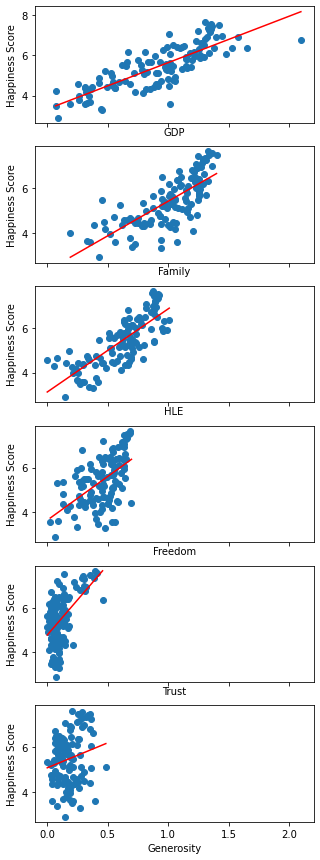

In [997]:
m2018_GDP,b2018_GDP,r2018_GDP,p2018_GDP,s2018_GDP = LR(data2018["GDP Per Capita"],data2018["Happiness Score"])
m2018_Family,b2018_Family,r2018_Family,p2018_Family,s2018_Family = LR(data2018["Family"],data2018["Happiness Score"])
m2018_HLE,b2018_HLE,r2018_HLE,p2018_HLE,s2018_HLE = LR(data2018["HLE"],data2018["Happiness Score"])
m2018_Freedom,b2018_Freedom,r2018_Freedom,p2018_Freedom,s2018_Freedom = LR(data2018["Freedom"],data2018["Happiness Score"])
m2018_Trust,b2018_Trust,r2018_Trust,p2018_Trust,s2018_Trust = LR(data2018["Trust"],data2019["Happiness Score"])
m2018_Generosity,b2018_Generosity,r2018_Generosity,p2018_Generosity,s2018_Generosity = LR(data2018["Generosity"],data2019["Happiness Score"]) 
X2018_GDP = np.array(data2018["GDP Per Capita"])
X2018_Family = np.array(data2018["Family"])
X2018_HLE = np.array(data2018["HLE"])
X2018_Freedom = np.array(data2018["Freedom"])
X2018_Trust = np.array(data2018["Trust"])
X2018_Gen = np.array(data2018["Generosity"])
Y2018 = np.array(data2018["Happiness Score"])
display(Markdown("# Columns vs Happiness Score in 2018"))
fig, axs = plt.subplots(6,figsize=(5,15),sharex=True)
xline2018_GDP=np.linspace(min(X2018_GDP),max(X2018_GDP),100)
yline2018_GDP=m2018_GDP*xline2018_GDP+b2018_GDP
axs[0].plot(xline2018_GDP,yline2018_GDP,color="red")
xline2018_Family=np.linspace(min(X2018_Family),max(X2018_Family),100)
yline2018_Family=m2018_Family*xline2018_Family+b2018_Family
axs[1].plot(xline2018_Family,yline2018_Family,color="red")
xline2018_HLE=np.linspace(min(X2018_HLE),max(X2018_HLE),100)
yline2018_HLE=m2018_HLE*xline2018_HLE+b2018_HLE
axs[2].plot(xline2018_HLE,yline2018_HLE,color="red")
xline2018_Freedom=np.linspace(min(X2018_Freedom),max(X2018_Freedom),100)
yline2018_Freedom=m2018_Freedom*xline2018_Freedom+b2018_Freedom
axs[3].plot(xline2018_Freedom,yline2018_Freedom,color="red")
xline2018_Trust=np.linspace(min(X2018_Trust),max(X2018_Trust),100)
yline2018_Trust=m2018_Trust*xline2018_Trust+b2018_Trust
axs[4].plot(xline2018_Trust,yline2018_Trust,color="red")
xline2018_Gen=np.linspace(min(X2018_Gen),max(X2018_Gen),100)
yline2018_Gen=m2018_Generosity*xline2018_Gen+b2018_Generosity
axs[5].plot(xline2018_Gen,yline2018_Gen,color="red")
axs[0].scatter(X2018_GDP, Y2018)
axs[1].scatter(X2018_Family, Y2018)
axs[2].scatter(X2018_HLE, Y2018)
axs[3].scatter(X2018_Freedom, Y2018)
axs[4].scatter(X2018_Trust, Y2018)
axs[5].scatter(X2018_Gen, Y2018)
axs[0].set_xlabel('GDP')
axs[1].set_xlabel('Family')
axs[2].set_xlabel('HLE')
axs[3].set_xlabel('Freedom')
axs[4].set_xlabel('Trust')
axs[5].set_xlabel('Generosity')
for ax in axs.flat:
    ax.set(ylabel='Happiness Score')
plt.show()

# Columns vs Happiness Score in 2019

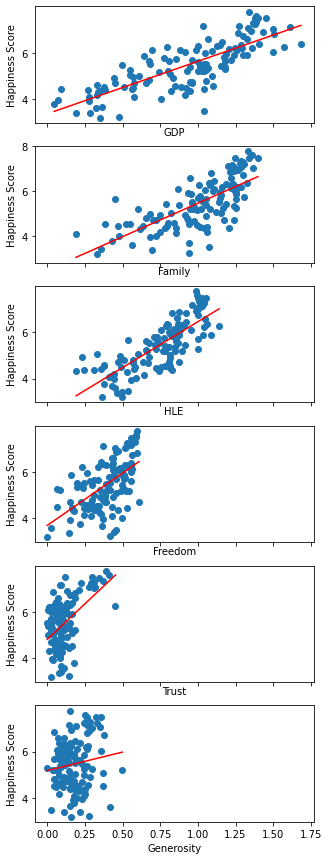

In [998]:
m2019_GDP,b2019_GDP,r2019_GDP,p2019_GDP,s2019_GDP = LR(data2019["GDP Per Capita"],data2019["Happiness Score"])
m2019_Family,b2019_Family,r2019_Family,p2019_Family,s2019_Family = LR(data2019["Family"],data2019["Happiness Score"])
m2019_HLE,b2019_HLE,r2019_HLE,p2019_HLE,s2019_HLE = LR(data2019["HLE"],data2019["Happiness Score"])
m2019_Freedom,b2019_Freedom,r2019_Freedom,p2019_Freedom,s2019_Freedom = LR(data2019["Freedom"],data2019["Happiness Score"])
m2019_Trust,b2019_Trust,r2019_Trust,p2019_Trust,s2019_Trust = LR(data2019["Trust"],data2019["Happiness Score"])
m2019_Generosity,b2019_Generosity,r2019_Generosity,p2019_Generosity,s2019_Generosity = LR(data2019["Generosity"],data2019["Happiness Score"]) 
X2019_GDP = np.array(data2019["GDP Per Capita"])
X2019_Family = np.array(data2019["Family"])
X2019_HLE = np.array(data2019["HLE"])
X2019_Freedom = np.array(data2019["Freedom"])
X2019_Trust = np.array(data2019["Trust"])
X2019_Gen = np.array(data2019["Generosity"])
Y2019 = np.array(data2019["Happiness Score"])
display(Markdown("# Columns vs Happiness Score in 2019"))
fig, axs = plt.subplots(6,figsize=(5,15),sharex=True)
xline2019_GDP=np.linspace(min(X2019_GDP),max(X2019_GDP),100)
yline2019_GDP=m2019_GDP*xline2019_GDP+b2019_GDP
axs[0].plot(xline2019_GDP,yline2019_GDP,color="red")
xline2019_Family=np.linspace(min(X2019_Family),max(X2019_Family),100)
yline2019_Family=m2019_Family*xline2019_Family+b2019_Family
axs[1].plot(xline2019_Family,yline2019_Family,color="red")
xline2019_HLE=np.linspace(min(X2019_HLE),max(X2019_HLE),100)
yline2019_HLE=m2019_HLE*xline2019_HLE+b2019_HLE
axs[2].plot(xline2019_HLE,yline2019_HLE,color="red")
xline2019_Freedom=np.linspace(min(X2019_Freedom),max(X2019_Freedom),100)
yline2019_Freedom=m2019_Freedom*xline2019_Freedom+b2019_Freedom
axs[3].plot(xline2019_Freedom,yline2019_Freedom,color="red")
xline2019_Trust=np.linspace(min(X2019_Trust),max(X2019_Trust),100)
yline2019_Trust=m2019_Trust*xline2019_Trust+b2019_Trust
axs[4].plot(xline2019_Trust,yline2019_Trust,color="red")
xline2019_Gen=np.linspace(min(X2019_Gen),max(X2019_Gen),100)
yline2019_Gen=m2019_Generosity*xline2019_Gen+b2019_Generosity
axs[5].plot(xline2019_Gen,yline2019_Gen,color="red")
axs[0].scatter(X2019_GDP, Y2019)
axs[1].scatter(X2019_Family, Y2019)
axs[2].scatter(X2019_HLE, Y2019)
axs[3].scatter(X2019_Freedom, Y2019)
axs[4].scatter(X2019_Trust, Y2019)
axs[5].scatter(X2019_Gen, Y2019)
axs[0].set_xlabel('GDP')
axs[1].set_xlabel('Family')
axs[2].set_xlabel('HLE')
axs[3].set_xlabel('Freedom')
axs[4].set_xlabel('Trust')
axs[5].set_xlabel('Generosity')
for ax in axs.flat:
    ax.set(ylabel='Happiness Score')
plt.show()

In [999]:
X=np.array(data2015[['GDP Per Capita','Family','Trust','Generosity','HLE','Freedom']])
Y=np.array(data2015["Happiness Score"]).reshape(-1,1)

In [1000]:
from sklearn.model_selection import train_test_split
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y,shuffle = True)

In [1001]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
reg=LR.fit(XTRAIN,YTRAIN)

In [1002]:
from sklearn.metrics import mean_squared_error, r2_score
YP=reg.predict(XTEST)
R2=r2_score(YTEST,YP)
MSE = mean_squared_error(YTEST,YP)
print("Rˆ2=",R2," MSE=",MSE)

Rˆ2= 0.7203238976103966  MSE= 0.3427076199892209


In [1003]:
r2s=[]
MSES=[]
models=2000
for j in range(models):
    # Create Model
    XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y)
    LR=LinearRegression()
    reg=LR.fit(XTRAIN,YTRAIN)
    
    # Make a prediction
    YP=reg.predict(XTEST)
    
    # Evaluate: R^2 and MSE 
    R2=r2_score(YTEST,YP)
    MSE = mean_squared_error(YTEST,YP)
    r2s.append(R2)
    MSES.append(MSE)


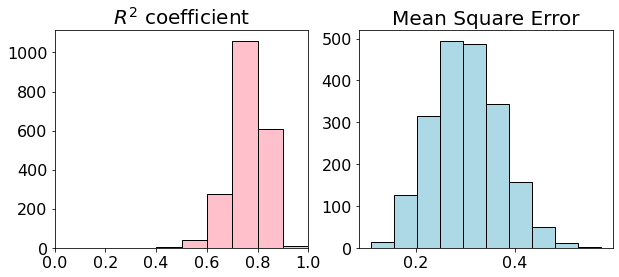

In [1004]:
# Create a 2x1 grid of plots
fig,ax=plt.subplots(nrows=1,ncols=2)

# Left plot
ax[0].hist(r2s,color="pink",edgecolor="black",
           bins=np.linspace(0,1,11))
ax[0].tick_params(labelsize=16)
ax[0].set_title("$R^2$ coefficient", fontsize=20)
ax[0].set_xlim(0,1)

# Right plot
ax[1].hist(MSES,color="lightblue",edgecolor="black")
ax[1].tick_params(labelsize=16)
ax[1].set_title("Mean Square Error", fontsize=20)

# Resize and save
fig.set_size_inches(10,4)
#fig.savefig("Machine-Performance-Evaluation.jpg")

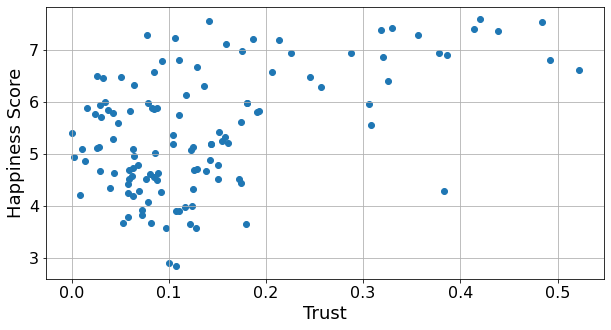

In [1005]:
import numpy as np
trust=np.array(data2015["Trust"])
score=np.array(data2015["Happiness Score"])
plt.scatter(trust,score)
plt.xlabel("Trust", fontsize=18)
plt.ylabel("Happiness Score", fontsize=18)
plt.title("",
          fontsize=18)
plt.tick_params(labelsize=16)
plt.grid()
plt.gcf().set_size_inches(10,5)
#plt.gcf().savefig("Early-Covid-LA.jpg")

In [1006]:
from scipy.optimize import curve_fit
def flog(x,a=1,k=1,x0=1):
    return a/(1+np.exp(-k*(x-x0)))

In [1007]:
parameters,covmatrix=curve_fit(flog,trust,score,p0=(50,.1,.1))
afit,kfit,x0fit=parameters
print("a =",afit)
print("k =",kfit)
print("x0=",x0fit)

a = 44.517628697959964
k = 1.0139838767235887
x0= 2.09013065914384


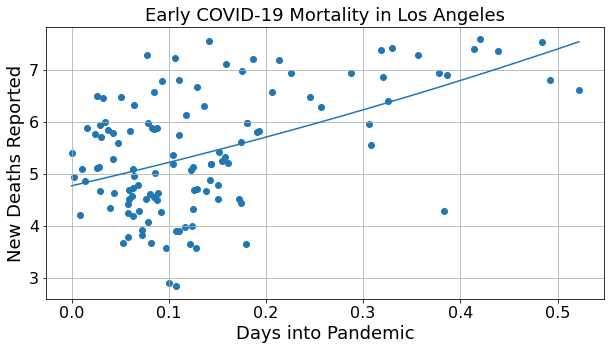

In [1008]:
xline=np.linspace(min(trust),max(trust),100)
plt.plot(xline,flog(xline,*parameters))
plt.scatter(trust,score)
plt.xlabel("Days into Pandemic", fontsize=18)
plt.ylabel("New Deaths Reported", fontsize=18)
plt.title("Early COVID-19 Mortality in Los Angeles",
          fontsize=18)
plt.tick_params(labelsize=16)
plt.grid()
plt.gcf().set_size_inches(10,5)
#plt.gcf().savefig("Early-Covid-LA.jpg")

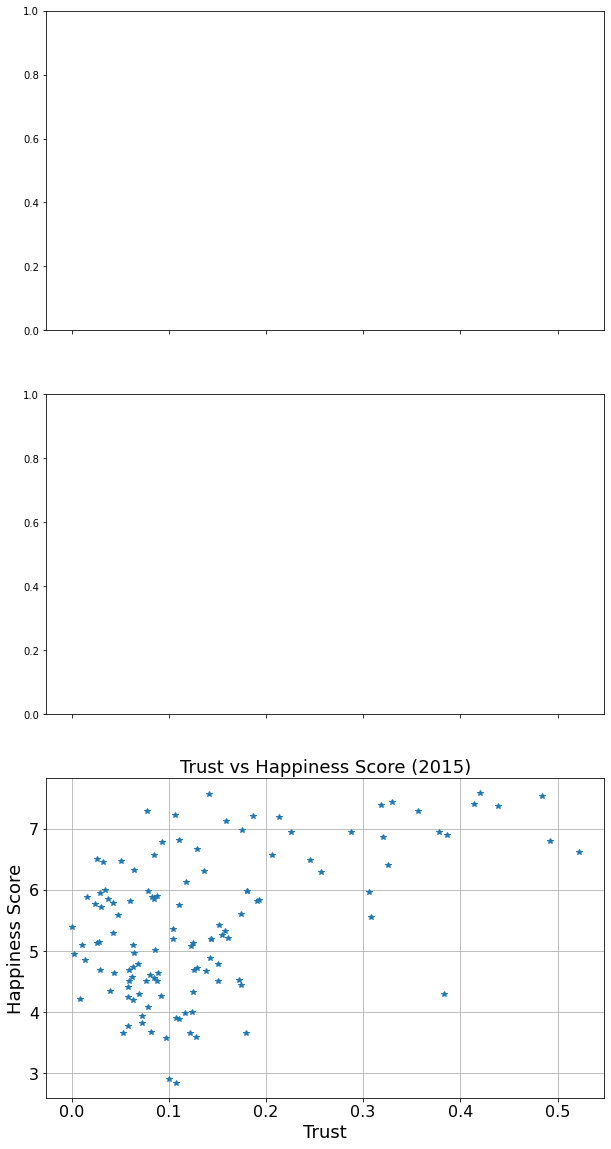

In [1009]:
fig,(axa, axk, axx0)=plt.subplots(nrows=3, ncols=1, sharex=True)
#axx0.plot(xline, flog(xline,a, k, x0-2*sx0), color="black")
trust=np.array(data2015["Trust"])
score=np.array(data2015["Happiness Score"])
axx0.plot(trust,score,'*')
plt.xlabel("Trust", fontsize=18)
plt.ylabel("Happiness Score", fontsize=18)
plt.title("Trust vs Happiness Score (2015)",
          fontsize=18)
plt.tick_params(labelsize=16)
plt.grid()
plt.gcf().set_size_inches(10,20)